### Análise Exploratória dos Dados

In [120]:
import pandas as pd

In [121]:
df = pd.read_csv('../data/obesity.csv')

In [122]:
df.head(10)


,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II
5,Male,29.0,1.62,53.0,no,yes,2.0,3.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Automobile,Normal_Weight
6,Female,23.0,1.50,55.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,0.0,Sometimes,Motorbike,Normal_Weight
7,Male,22.0,1.64,53.0,no,no,2.0,3.0,Sometimes,no,2.0,no,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
8,Male,24.0,1.78,64.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,1.0,Frequently,Public_Transportation,Normal_Weight
9,Male,22.0,1.72,68.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,1.0,1.0,no,Public_Transportation,Normal_Weight


In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          2111 non-null   object 
 1   Age             2111 non-null   float64
 2   Height          2111 non-null   float64
 3   Weight          2111 non-null   float64
 4   family_history  2111 non-null   object 
 5   FAVC            2111 non-null   object 
 6   FCVC            2111 non-null   float64
 7   NCP             2111 non-null   float64
 8   CAEC            2111 non-null   object 
 9   SMOKE           2111 non-null   object 
 10  CH2O            2111 non-null   float64
 11  SCC             2111 non-null   object 
 12  FAF             2111 non-null   float64
 13  TUE             2111 non-null   float64
 14  CALC            2111 non-null   object 
 15  MTRANS          2111 non-null   object 
 16  Obesity         2111 non-null   object 
dtypes: float64(8), object(9)
memory u

In [124]:
df.nunique()

Gender               2
Age               1402
Height            1574
Weight            1525
family_history       2
FAVC                 2
FCVC               810
NCP                635
CAEC                 4
SMOKE                2
CH2O              1268
SCC                  2
FAF               1190
TUE               1129
CALC                 4
MTRANS               5
Obesity              7
dtype: int64

### Tratamento das colunas

In [125]:
df_tratado = df.copy()

In [126]:
# Substituição de valores 'yes' e 'no'
df_tratado['family_history'] = df_tratado['family_history'].replace(['yes','no'],[1,0])
df_tratado['FAVC'] = df_tratado['FAVC'].replace(['yes','no'],[1,0])
df_tratado['SMOKE'] = df_tratado['SMOKE'].replace(['yes','no'],[1,0])
df_tratado['SCC'] = df_tratado['SCC'].replace(['yes','no'],[1,0])

C:\Users\Mariusso\AppData\Local\Temp\ipykernel_9208\4280731625.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_tratado['family_history'] = df_tratado['family_history'].replace(['yes','no'],[1,0])
C:\Users\Mariusso\AppData\Local\Temp\ipykernel_9208\4280731625.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_tratado['FAVC'] = df_tratado['FAVC'].replace(['yes','no'],[1,0])
C:\Users\Mariusso\AppData\Local\Temp\ipykernel_9208\4280731625.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be remove

In [127]:
# Arrendodamento de casas decimais
df_tratado['FCVC'] = df_tratado['FCVC'].round()
df_tratado['NCP'] = df_tratado['NCP'].round()
df_tratado['CH2O'] = df_tratado['CH2O'].round()
df_tratado['FAF'] = df_tratado['FAF'].round()
df_tratado['TUE'] = df_tratado['TUE'].round()

In [128]:
# Substituição de palavras de frequência
df_tratado['CAEC'] = df_tratado['CAEC'].replace(['no','Sometimes','Frequently','Always'],[0,1,2,3])
df_tratado['CALC'] = df_tratado['CALC'].replace(['no','Sometimes','Frequently','Always'],[0,1,2,3])

C:\Users\Mariusso\AppData\Local\Temp\ipykernel_9208\629523755.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_tratado['CAEC'] = df_tratado['CAEC'].replace(['no','Sometimes','Frequently','Always'],[0,1,2,3])
C:\Users\Mariusso\AppData\Local\Temp\ipykernel_9208\629523755.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_tratado['CALC'] = df_tratado['CALC'].replace(['no','Sometimes','Frequently','Always'],[0,1,2,3])


In [129]:
# Tratamento da coluna 'Gender'
df_tratado['Gender'] = df_tratado['Gender'].replace(['Female','Male'],[0,1])

C:\Users\Mariusso\AppData\Local\Temp\ipykernel_9208\55889580.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_tratado['Gender'] = df_tratado['Gender'].replace(['Female','Male'],[0,1])


In [130]:
# Tratamento coluna 'MTRANS'
df_tratado = pd.get_dummies(df_tratado, columns=['MTRANS'], prefix='transporte', dtype=int, drop_first=False)

In [131]:
# Tratamento coluna 'Obesity'
obesidade_map = {
    'Insufficient_Weight': 0,
    'Normal_Weight': 1,
    'Overweight_Level_I': 2,
    'Overweight_Level_II': 3,
    'Obesity_Type_I': 4,
    'Obesity_Type_II': 5,
    'Obesity_Type_III': 6
}
df_tratado['Obesity'] = df_tratado['Obesity'].replace(obesidade_map)

C:\Users\Mariusso\AppData\Local\Temp\ipykernel_9208\1400248874.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_tratado['Obesity'] = df_tratado['Obesity'].replace(obesidade_map)


In [132]:
df_tratado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 21 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Gender                            2111 non-null   int64  
 1   Age                               2111 non-null   float64
 2   Height                            2111 non-null   float64
 3   Weight                            2111 non-null   float64
 4   family_history                    2111 non-null   int64  
 5   FAVC                              2111 non-null   int64  
 6   FCVC                              2111 non-null   float64
 7   NCP                               2111 non-null   float64
 8   CAEC                              2111 non-null   int64  
 9   SMOKE                             2111 non-null   int64  
 10  CH2O                              2111 non-null   float64
 11  SCC                               2111 non-null   int64  
 12  FAF   

In [133]:
df_tratado.head(10)

,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,...,SCC,FAF,TUE,CALC,Obesity,transporte_Automobile,transporte_Bike,transporte_Motorbike,transporte_Public_Transportation,transporte_Walking
0,0,21.0,1.62,64.0,1,0,2.0,3.0,1,0,...,0,0.0,1.0,0,1,0,0,0,1,0
1,0,21.0,1.52,56.0,1,0,3.0,3.0,1,1,...,1,3.0,0.0,1,1,0,0,0,1,0
2,1,23.0,1.80,77.0,1,0,2.0,3.0,1,0,...,0,2.0,1.0,2,1,0,0,0,1,0
3,1,27.0,1.80,87.0,0,0,3.0,3.0,1,0,...,0,2.0,0.0,2,2,0,0,0,0,1
4,1,22.0,1.78,89.8,0,0,2.0,1.0,1,0,...,0,0.0,0.0,1,3,0,0,0,1,0
5,1,29.0,1.62,53.0,0,1,2.0,3.0,1,0,...,0,0.0,0.0,1,1,1,0,0,0,0
6,0,23.0,1.50,55.0,1,1,3.0,3.0,1,0,...,0,1.0,0.0,1,1,0,0,1,0,0
7,1,22.0,1.64,53.0,0,0,2.0,3.0,1,0,...,0,3.0,0.0,1,1,0,0,0,1,0
8,1,24.0,1.78,64.0,1,1,3.0,3.0,1,0,...,0,1.0,1.0,2,1,0,0,0,1,0
9,1,22.0,1.72,68.0,1,1,2.0,3.0,1,0,...,0,1.0,1.0,0,1,0,0,0,1,0


In [134]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: >

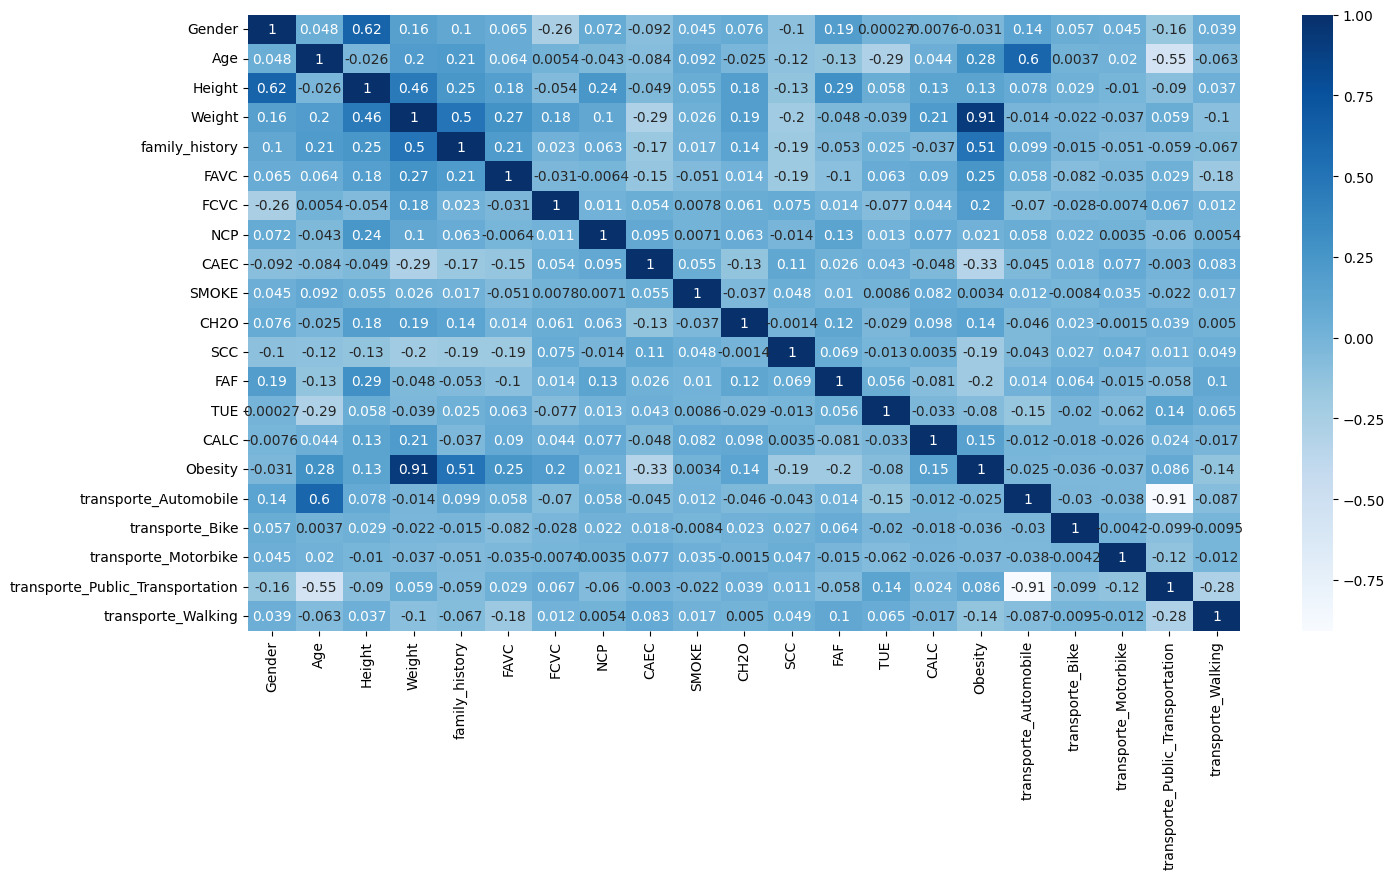

In [135]:
corr = df_tratado.corr()
plt.figure(figsize=(16,8))
sns.heatmap(corr, cmap='Blues', annot=True)

### Modelos de ML

#### Separando a base

In [136]:
x = df_tratado.drop('Obesity', axis=1)
y = df_tratado['Obesity']

print(x.shape)
print(y.shape)

(2111, 20)
(2111,)


In [137]:
from sklearn.model_selection import train_test_split

In [138]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

print(f"Total de amostras: {len(x)}")
print(f"Treino: {len(x_train)} amostras ({len(x_train)/len(x)*100:.1f}%)")
print(f"Teste: {len(x_test)} amostras ({len(x_test)/len(x)*100:.1f}%)")

print(f"\nDistribuição no treino:\n{y_train.value_counts()}")
print(f"\nDistribuição no teste:\n{y_test.value_counts()}")

Total de amostras: 2111
Treino: 1688 amostras (80.0%)
Teste: 423 amostras (20.0%)

Distribuição no treino:
Obesity
4    281
6    259
5    237
3    232
2    232
1    229
0    218
Name: count, dtype: int64

Distribuição no teste:
Obesity
4    70
6    65
5    60
3    58
1    58
2    58
0    54
Name: count, dtype: int64


#### Treinando e Escolhendo o modelo de ML

In [139]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import xgboost as xgb
import joblib

# Dicionário com os modelos
modelos = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'XGBoost': xgb.XGBClassifier(random_state=42, eval_metric='mlogloss'),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42)
}

# Dicionários para guardar resultados e modelos treinados
resultados = {}
modelos_treinados = {}

# Treina e avalia cada modelo
for nome, modelo in modelos.items():
    print(f"\n{'='*60}")
    print(f"🔄 Treinando: {nome}")
    print('='*60)
    
    # Treinar modelo
    modelo.fit(x_train, y_train)
    
    # Predições
    y_pred = modelo.predict(x_test)
    
    # Avaliação
    acc = accuracy_score(y_test, y_pred)
    resultados[nome] = acc
    modelos_treinados[nome] = modelo  # <-- guarda o modelo TREINADO
    
    print(f"\n✅ Acurácia: {acc:.4f} ({acc*100:.2f}%)")
    print("\n📊 Relatório de Classificação:")
    print(classification_report(y_test, y_pred))

# Ranking final
print("\n" + "="*60)
print("🏆 RANKING DOS MODELOS")
print("="*60)

for i, (nome, acc) in enumerate(
    sorted(resultados.items(), key=lambda x: x[1], reverse=True), 1
):
    print(f"{i}º lugar: {nome:.<40} {acc:.4f} ({acc*100:.2f}%)")

# Melhor modelo (AGORA CORRETO)
melhor_modelo_nome = max(resultados, key=resultados.get)
melhor_modelo = modelos_treinados[melhor_modelo_nome]

print(
    f"\n🥇 Melhor modelo: {melhor_modelo_nome} "
    f"com {resultados[melhor_modelo_nome]*100:.2f}% de acurácia"
)


🔄 Treinando: Random Forest

✅ Acurácia: 0.9314 (93.14%)

📊 Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.98      0.94      0.96        54
           1       0.82      0.86      0.84        58
           2       0.84      0.84      0.84        58
           3       0.95      0.93      0.94        58
           4       0.96      0.99      0.97        70
           5       0.98      0.95      0.97        60
           6       0.98      0.98      0.98        65

    accuracy                           0.93       423
   macro avg       0.93      0.93      0.93       423
weighted avg       0.93      0.93      0.93       423


🔄 Treinando: XGBoost

✅ Acurácia: 0.9574 (95.74%)

📊 Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.98      0.94      0.96        54
           1       0.88      0.97      0.92        58
           2       0.94      0.88      0.91        58
           3    

c:\Users\Mariusso\modelo_obesidade\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [140]:
print(x_train.columns.tolist())


['Gender', 'Age', 'Height', 'Weight', 'family_history', 'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'transporte_Automobile', 'transporte_Bike', 'transporte_Motorbike', 'transporte_Public_Transportation', 'transporte_Walking']


In [141]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import xgboost as xgb
import joblib

num_cols = x_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = x_train.select_dtypes(include=['object']).columns.tolist()

print("Numéricas:", num_cols)
print("Categóricas:", cat_cols)

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
])

model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', xgb.XGBClassifier(
        random_state=42,
        eval_metric='mlogloss'
    ))
])

model.fit(x_train, y_train)
joblib.dump(model, '../model.pkl')


Numéricas: ['Gender', 'Age', 'Height', 'Weight', 'family_history', 'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'transporte_Automobile', 'transporte_Bike', 'transporte_Motorbike', 'transporte_Public_Transportation', 'transporte_Walking']
Categóricas: []


['../model.pkl']

In [142]:
print(x_train.columns.tolist())


['Gender', 'Age', 'Height', 'Weight', 'family_history', 'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'transporte_Automobile', 'transporte_Bike', 'transporte_Motorbike', 'transporte_Public_Transportation', 'transporte_Walking']
